Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

**IMPORTANT: DO NOT COPY OR SPLIT CELLS.** If you do, you'll mess the autograder. If need more cells to work or test things out, create a new cell. You may add as many new cells as you need.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and group below:

In [1]:
COURSE = "Unsupervised Learning 2021"
GROUP = "D8A"
NAME = "Cano Morales Jeorval Jose" # Match your GitHub Classroom ID

---

# Robust Principal Component Analysis

## Implementation (6 pts)

In this exercise, you will implement RPCA using the ADMM method reviewd in class. Then you will test it with synthetic data sets, and with handwritten digits.

Choose the step size for the ADMM algorithm as $\rho = \frac{nd}{4|M|_1}$.

Terminate the algorithm when $|M - L - S|_F \leq \delta |M|_F$, with $\delta=10^{-7}$.

This implementation is slow for large matrice, we could use a partial SVD to speed things up.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

%matplotlib inline

In [8]:
def soft_t(X, t):
    # Implement soft-thresholding
    
    # YOUR CODE HERE
    sign_X = np.sign(X)
    subs = np.abs(X) - t
    max_ = np.maximum(subs, np.zeros(X.shape))
    return sign_X * max_
    
def SVT(M, t):
    # Implement Singular value thresholding
    
    # YOUR CODE HERE
    U, S, V = np.linalg.svd(M, full_matrices=False)
    diag = np.diag(soft_t(S, t))
    dot_product = np.dot(diag, V)
    return np.dot(U, dot_product)


def rpca(M, maxiter=10000):
    
    # You need to return the following variables correctly
    L = np.zeros(M.shape)
    S = np.zeros(M.shape)
    
    Y = np.zeros(M.shape) #Yk
    
    norm_ = 4 * np.linalg.norm(M, ord=1)
    MU = np.prod(M.shape) / norm_
    MU_inv = 1 / MU
    
    # YOUR CODE HERE
    lambda_ = 1 / np.sqrt(np.max(M.shape))
    
    controller = 0
    tolerance = 1E-6
    error = np.inf
    
    while (error > tolerance) and controller < maxiter:
        
        temp = M - S + MU_inv * Y
        
        L = SVT(temp, MU_inv)
        
        temp1 = M - L + (MU_inv * Y)
        
        temp2 = MU_inv * lambda_
        
        S = soft_t(temp1, temp2)
        
        Y = Y + MU * (M - L - S)
        
        error = np.linalg.norm(M - L - S, ord='fro')
        controller += 1    
        
    return L, S

In [9]:
# Generate a synthetic low rank matrix of size nxn with n = 100
n = 100
r = int(0.05*n) # Rank
k = int(0.05*n**2) # Number of non-zero entries of S
X = np.random.normal(loc=0, scale=1/500, size=(n,r))
Y = np.random.normal(loc=0, scale=1/500, size=(n,r))
E = (-1)**np.random.randint(0, 2, size=(n, n))
S = np.zeros((n,n))
mask = np.array([True]*k + [False]*(n*n-k))
np.random.shuffle(mask)
mask = mask.reshape((n,n))
S[mask] = E[mask]

M = X @ Y.T + S

In [10]:
# Check succesful recovery
Lr, Sr = rpca(M)
assert np.allclose(Lr, X@Y.T, atol=1e-6)

In [11]:
np.allclose(Lr, X@Y.T, atol=1e-6)

True

# Question 1 (2 pts)

Verify that the solution that minimizes

\begin{align}
\lambda|S|_1 + \frac{\rho}{2}\left|S - M + L_{k+1} - Y_k/\rho) \right|_F^2
\end{align}

with respect to $S$ is given by

$$
S_{k+1} = S_{\frac{\lambda}{\rho}}\left( M - L_{k+1} + \frac{Y_k}{\rho}  \right)
$$

YOUR ANSWER HERE

# Question 1 (2 pts)

The right eigenvectors of the decomposition $\phi(X) = UDV^T$, i.e., the eigenvectors (loadings) in feature space, can be expanded in terms of the basis of observations,

$$
v_m = \sum_{j=1}^n \alpha_{jm}\phi(x_j)
$$

Show that the principal components for KPCA are given by

$$
z_{im} = v_m^T \phi(x_i) = \sum_{j=1}^n \alpha_{jm}\phi(x_j)^T \phi(x_i)
= \sum_{j=1}^n \alpha_{jm}K(x_i, x_j)
$$

with $\alpha_{jm} = u_{jm}/d_m$, assume a centered K matrix. This is, the vector of coefficients, $\alpha_m$ is equal to the $m$ eigenvector divided by the square of the eigenvalue, $\alpha_m = u_m/d_m$.

Also show that if the K matrix is not centered, we can still project any existing observation by centering K before, and any new observation $x_0$, by applying

$$
\vec{z}_{m} = A (I - M)\left(\vec{k}_0 - \frac{1}{N} K \vec{1}\right)
$$

where $A$ is the matrix of column vectors $\alpha_m$ given by $A=U D^{-1}$, and $k_0$ is a vector of kernel products $\phi(x_0)^T\phi(x_i)$ with all observations $x_i$.

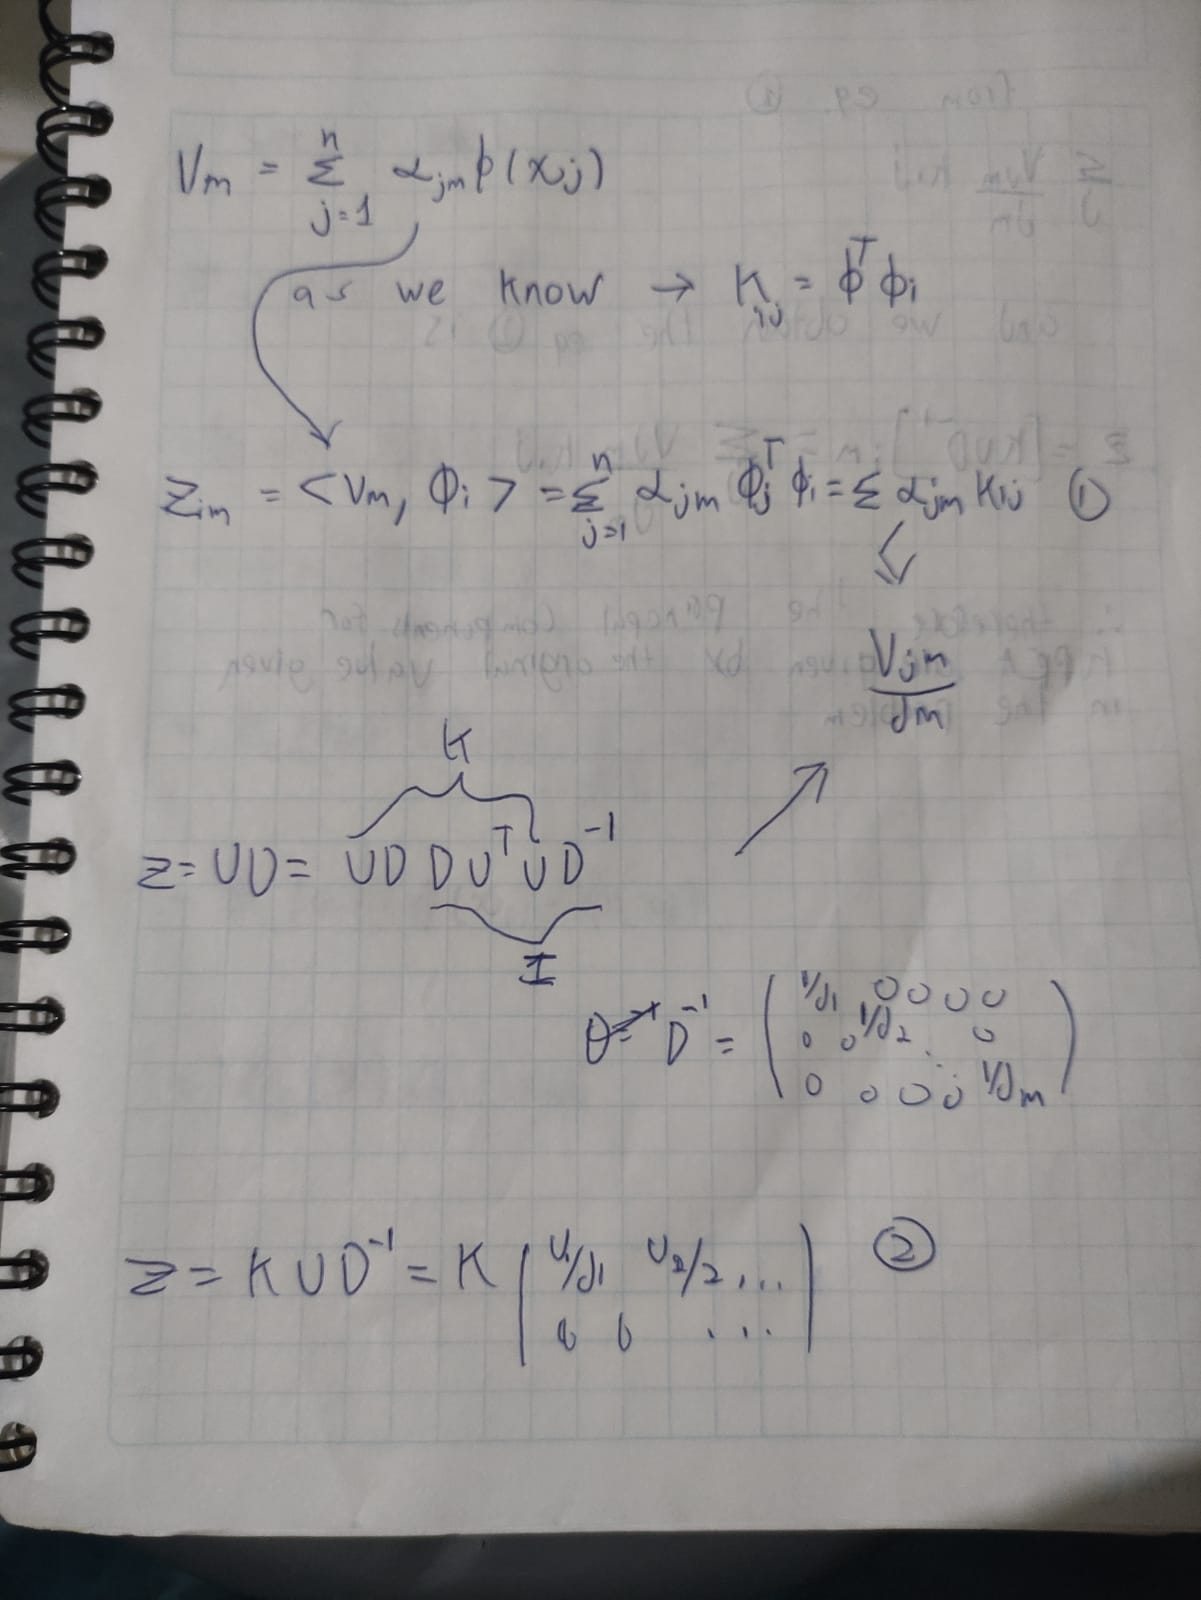

In [13]:
display.Image("SolutionImages/Problem2_1.jpg")

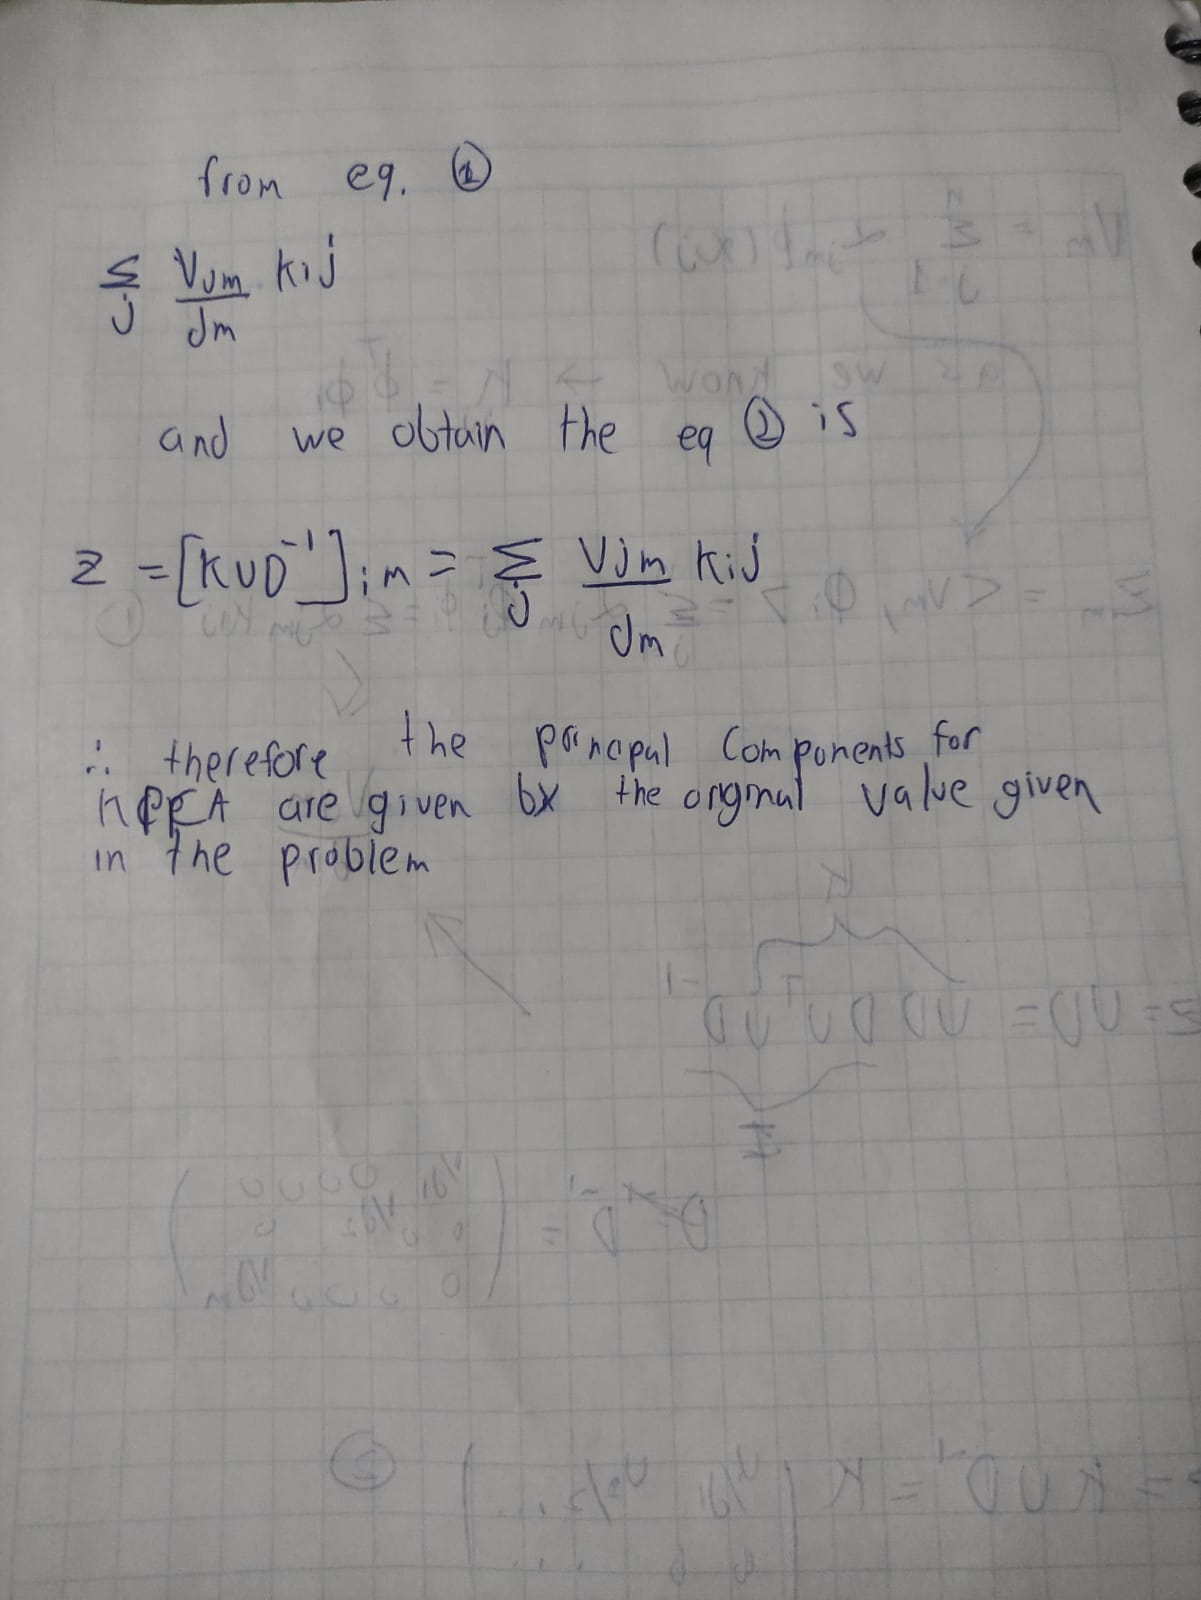

In [14]:
display.Image("SolutionImages/Problem2_1_2.jpg")

## Part 2 

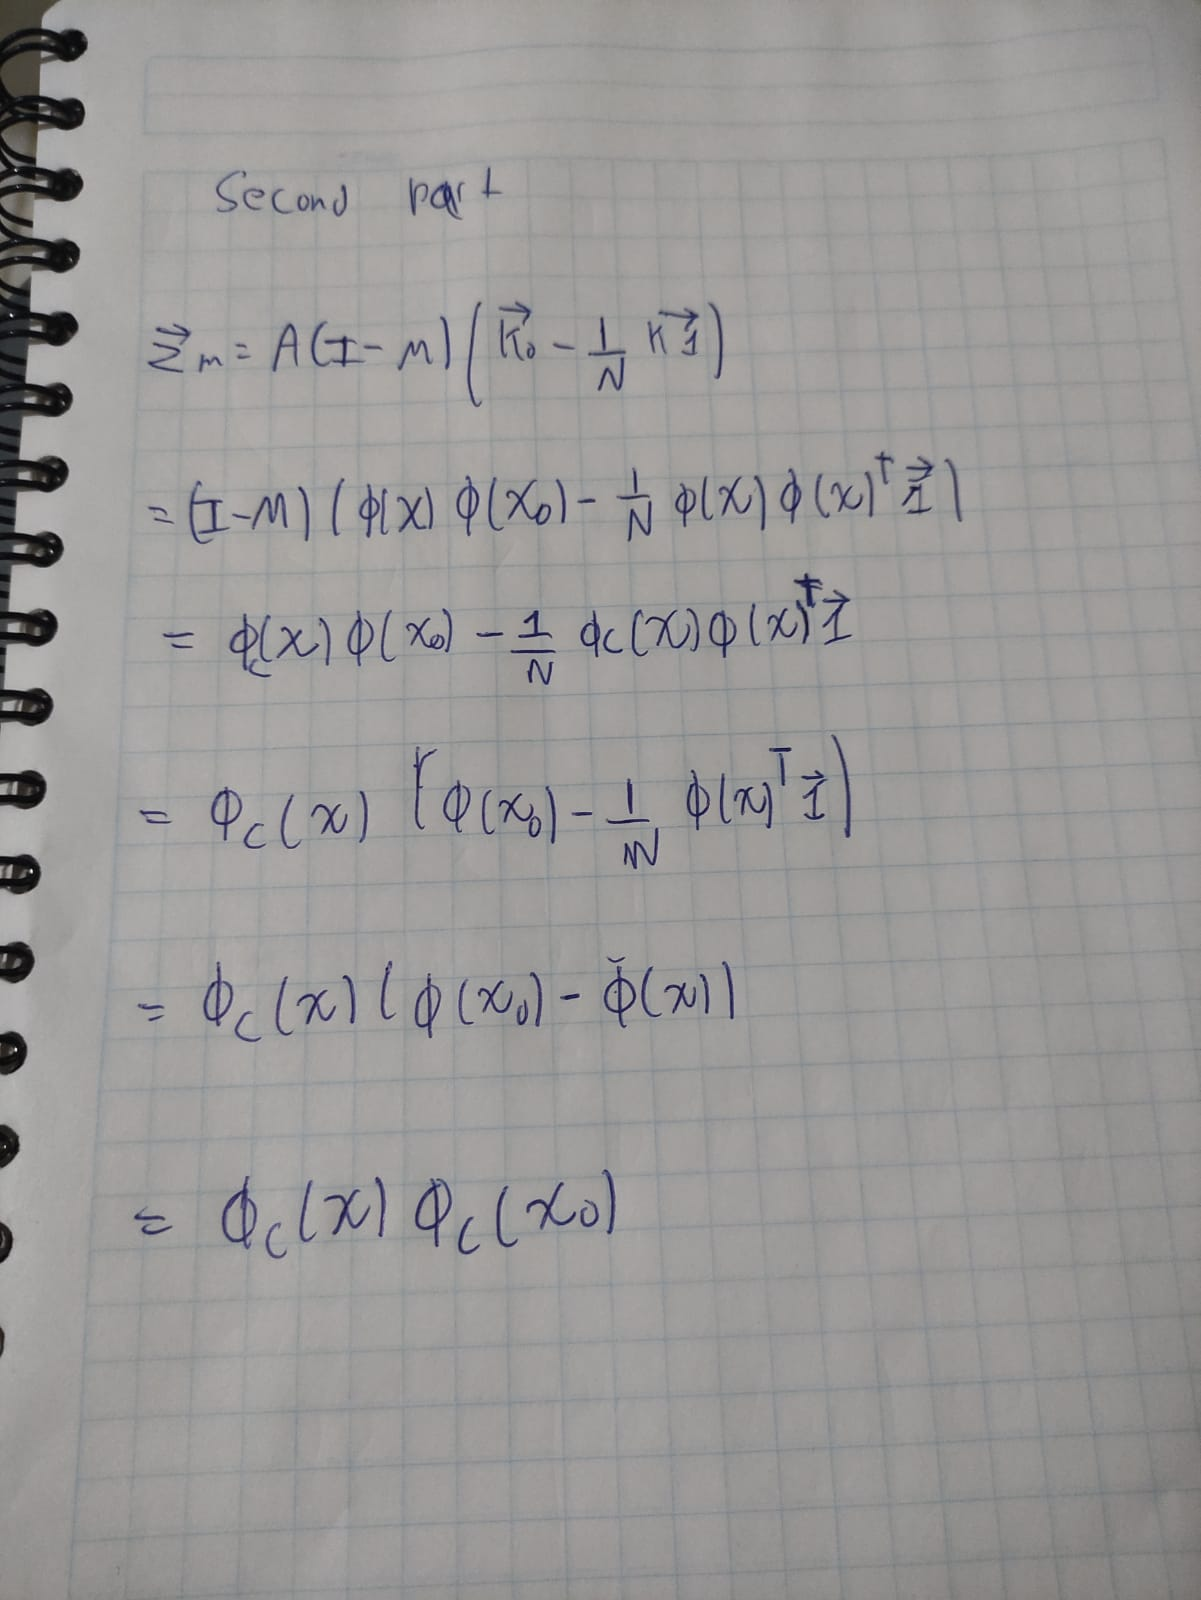

In [15]:
display.Image("SolutionImages/Problem2_2.jpg")